In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


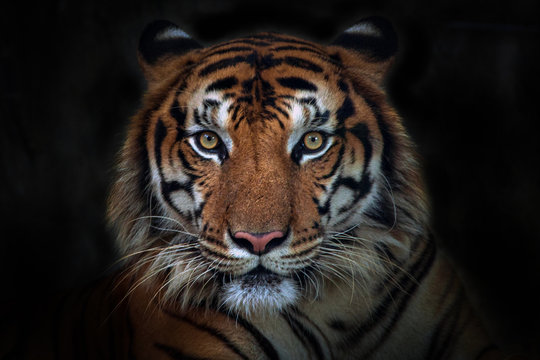

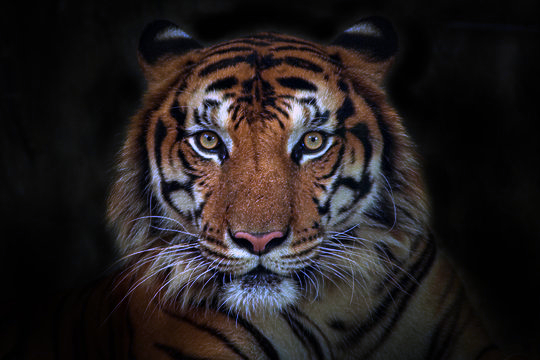

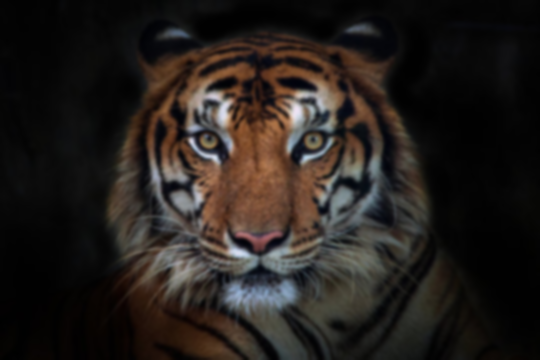

In [86]:

def sharpen_image(image, kernel_size=(7, 7), gamma=2):
  # TODO: Apply a smoothing filter (e.g., Gaussian blur)
  blurred_image = cv2.GaussianBlur(image, kernel_size,0)
  # TODO: Calculate the difference between the original and blurred image
  difference = cv2.subtract(image, blurred_image)
  # TODO: Apply the gamma factor
  sharpened_detail = cv2.multiply(difference, np.array([gamma]))
  # TODO:
  # Add the sharpened detail back to the original image
  sharpened_image = cv2.add(image, sharpened_detail)
  # Convert sharpened_detail to the same data type as the original image
  sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)
  #pass # return the sharp image and the blur one
  return sharpened_image, blurred_image

image = cv2.imread('tiger.jpg')
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print("Error: Could not load image.")

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


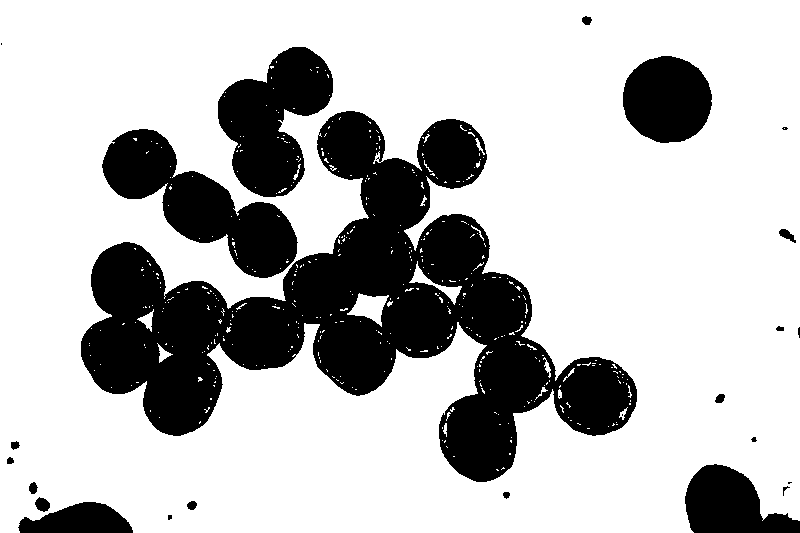

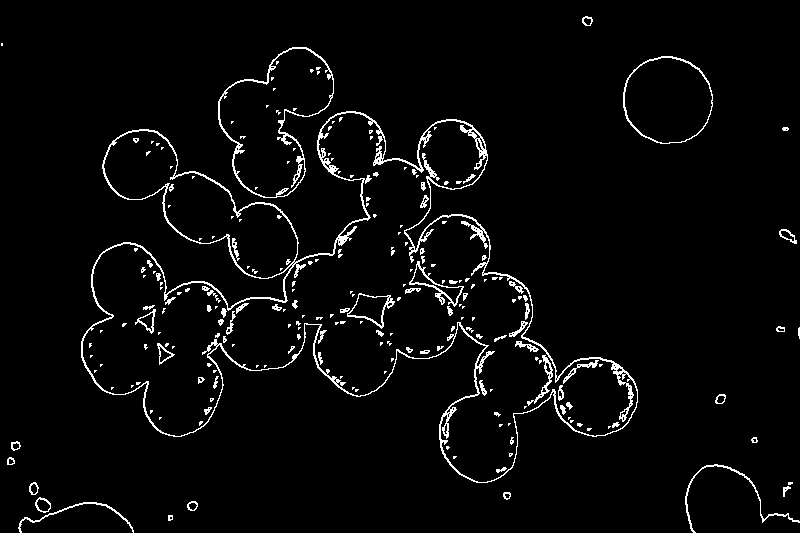

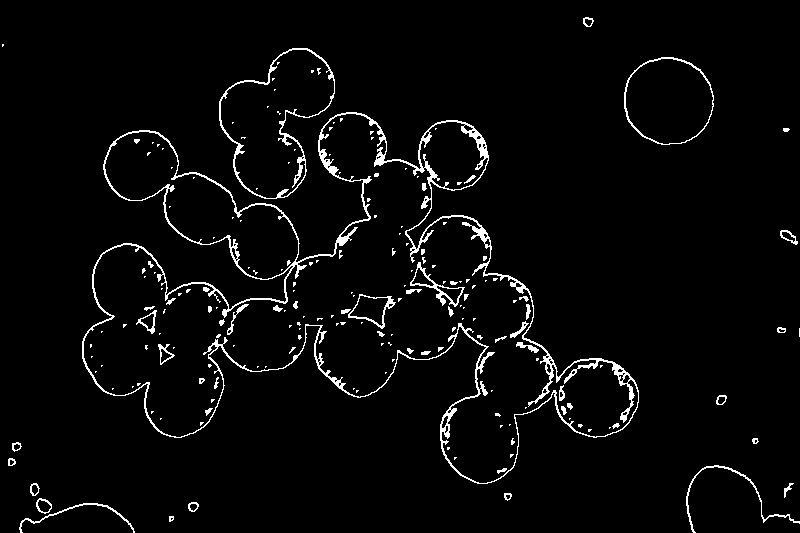

In [87]:
# Read the image
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# TODO: Morphological edge detection (dilate and then erode and then ...)
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
eroded = cv2.erode(binary, kernel2, iterations=1)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
dilated = cv2.dilate(binary, kernel1, iterations=2)

final=dilated - eroded

# TODO: clean edges with morphological closing
closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

# اعمال عملیات closing
cleaned_edges = cv2.morphologyEx(final, cv2.MORPH_CLOSE, closing_kernel, iterations=1)
# TODO: Show results
cv2_imshow(binary)
cv2_imshow(final)
cv2_imshow(cleaned_edges)


# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

26


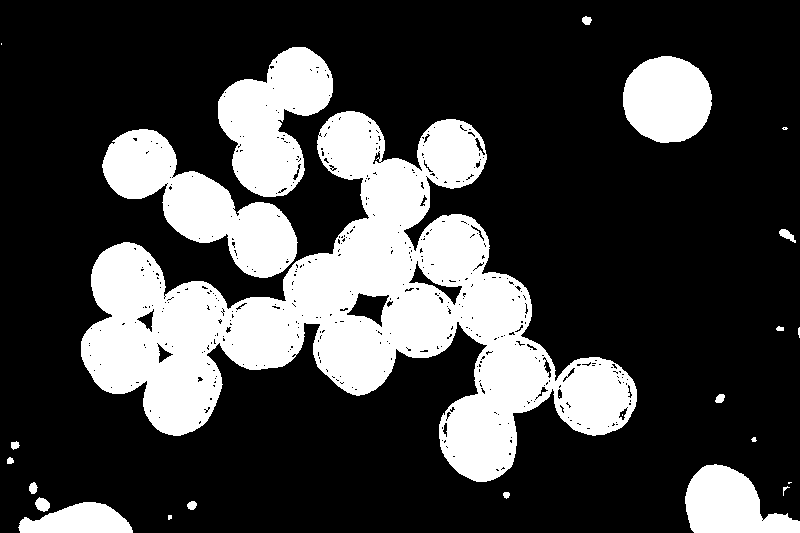

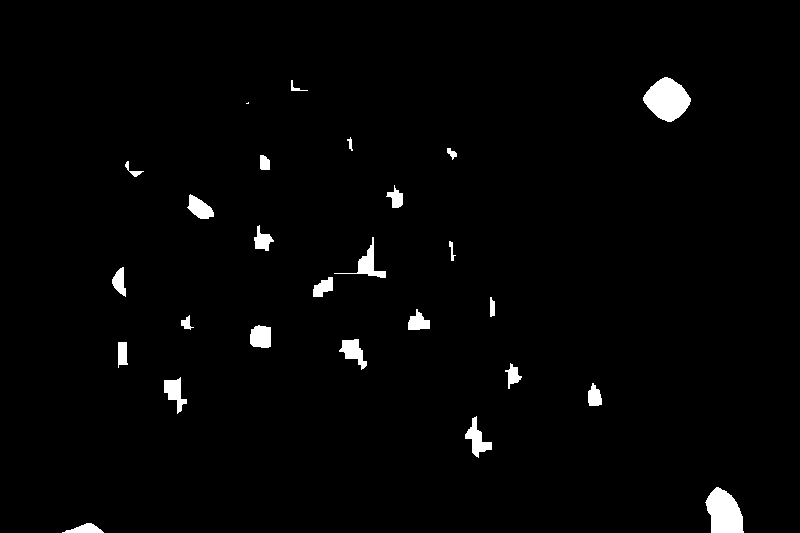

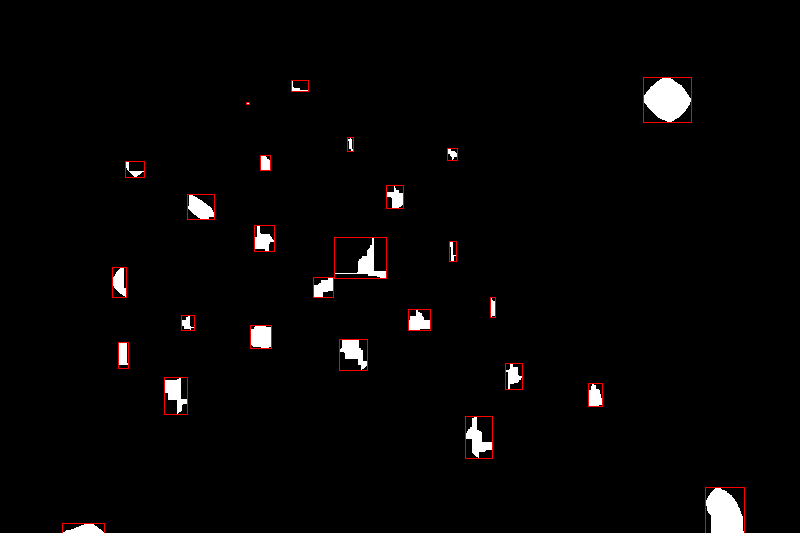

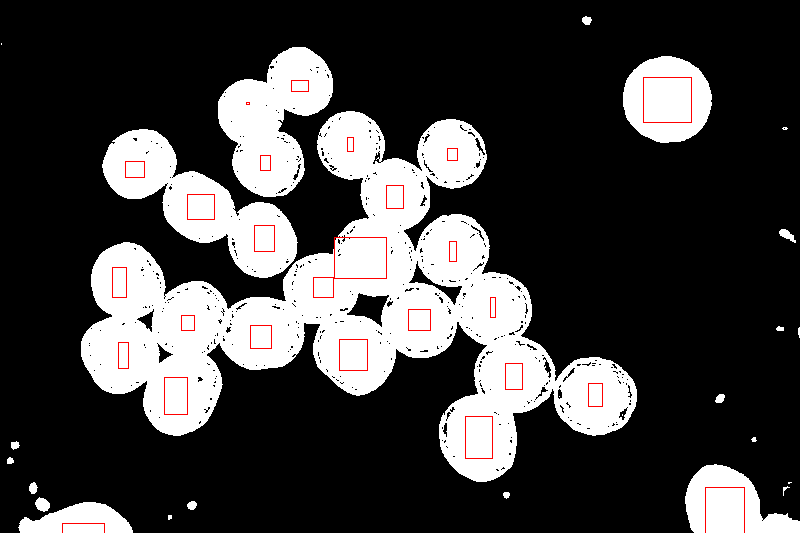

In [88]:
# Load image (grayscale)
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

# TODO: Erosion to remove small noise
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(binary, kernel2, iterations=17)
# TODO: Connected component analysis
num, labels = cv2.connectedComponents(eroded, connectivity=8, ltype=cv2.CV_32S)
# TODO: print the number of components
print(num-1)
# TODO: Draw results (Boxes)
num, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded)
counted = cv2.cvtColor(eroded, cv2.COLOR_GRAY2BGR)
output = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
for i in range(1, num):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    cv2.rectangle(counted, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 0, 255), 1)
# TODO: Display
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(binary, kernel1, iterations=17)

cv2_imshow(binary)
cv2_imshow(eroded)
cv2_imshow(counted)
cv2_imshow(output)


# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge